## Homework Answer 

by Rahma Hayuning Astuti

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# download dataset
import urllib.request
url = 'https://archive.ics.uci.edu/static/public/222/bank+marketing.zip'
filename = '../data/bank+marketing.zip'
urllib.request.urlretrieve(url, filename)

('../data/bank+marketing.zip', <http.client.HTTPMessage at 0x28dc74b0be0>)

In [63]:
#data path 

data_path = "../data/week_03-04/bank/bank-full.csv"
df = pd.read_csv(data_path, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [64]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

need to drop column ['default', 'loan']

In [65]:
df = df.drop(['default', 'loan'], axis = 1)
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [66]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [67]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Question 1
What is the most frequent observation (mode) for the column education?

    unknown
    primary
    secondary
    tertiary


In [68]:
print(df['education'].mode())
print(df['education'].value_counts())

0    secondary
Name: education, dtype: object
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


Answer: Secondary

### Question 2

create correlation matrix with

    age and balance
    day and campaign
    day and pdays
    pdays and previous


In [69]:
select_cols = ['age', 'balance', 'day', 'campaign','pdays', 'previous']
print(select_cols)

['age', 'balance', 'day', 'campaign', 'pdays', 'previous']


               age   balance       day  campaign     pdays  previous
age       1.000000  0.097783 -0.009120  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000  0.162490 -0.093044 -0.051710
campaign  0.004760 -0.014578  0.162490  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710 -0.032855  0.454820  1.000000


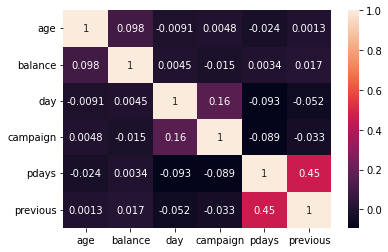

In [70]:
#using plot
correlation = df[select_cols].corr()
sns.heatmap(correlation, annot=True)
print(correlation)

Two features that have the biggest correlation: pdays and previous

### Target Encoding

encode the y label from yes/no to 1/0

In [71]:
#encoding yes/no to 1/0
df['y'] = df['y'].map({'yes':1, 'no':0})


In [72]:
df['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

### Split data

In [73]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42) 
print(len(df_full_train), len(df_test))

#split to train and val
df_train, df_val =  train_test_split(df_full_train, test_size=0.25, random_state=42)
print('df_train: ', len(df_train))
print('df_val: ', len(df_val))
print('df_test: ', len(df_test))

36168 9043
df_train:  27126
df_val:  9042
df_test:  9043


### Question 3

- find mutual information between 'y' and other categorical (training set only)
- round scores to 2 decimal 

In [74]:
df_train.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
20326,32,technician,single,tertiary,1100,yes,cellular,11,aug,67,1,-1,0,unknown,0
24301,38,entrepreneur,married,secondary,0,yes,cellular,17,nov,258,1,-1,0,unknown,0
38618,49,blue-collar,married,secondary,3309,yes,cellular,15,may,349,2,-1,0,unknown,0
18909,37,housemaid,married,primary,2410,no,cellular,4,aug,315,1,-1,0,unknown,0
23081,31,self-employed,married,tertiary,3220,no,cellular,26,aug,74,4,-1,0,unknown,0


In [75]:
#rest index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [76]:
#y variable
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

need to find mutual score first

In [78]:
cat_colls = [i for i in df_train.dtypes[df_train.dtypes == 'object'].index]
print(cat_colls)

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']


In [80]:
from sklearn.metrics import mutual_info_score

def mutual_info_with_y(series):
    return mutual_info_score(series, df_train.y).round(decimals=2)

mi = df_train[cat_colls].apply(mutual_info_with_y)
mi.sort_values(ascending=False)

month        0.03
poutcome     0.03
job          0.01
housing      0.01
contact      0.01
marital      0.00
education    0.00
dtype: float64

Answer: month, poutcome, job. (poutcome)

### Question 4

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [81]:
# drop the y variable first
df_train = df_train.drop(columns=['y'])
df_val = df_val.drop(columns=['y'])
df_test = df_test.drop(columns=['y'])

print(df_train)

       age            job   marital  education  balance housing   contact  \
0       32     technician    single   tertiary     1100     yes  cellular   
1       38   entrepreneur   married  secondary        0     yes  cellular   
2       49    blue-collar   married  secondary     3309     yes  cellular   
3       37      housemaid   married    primary     2410      no  cellular   
4       31  self-employed   married   tertiary     3220      no  cellular   
...    ...            ...       ...        ...      ...     ...       ...   
27121   27       services    single  secondary      167      no  cellular   
27122   40     technician    single   tertiary      693      no  cellular   
27123   54     technician  divorced  secondary        0     yes   unknown   
27124   25       services    single  secondary     2311      no  cellular   
27125   30     management    single   tertiary       15      no  cellular   

       day month  duration  campaign  pdays  previous poutcome  
0       11

In [82]:
train_dicts = df_train.to_dict(orient = 'records')
train_dicts[0]

{'age': 32,
 'job': 'technician',
 'marital': 'single',
 'education': 'tertiary',
 'balance': 1100,
 'housing': 'yes',
 'contact': 'cellular',
 'day': 11,
 'month': 'aug',
 'duration': 67,
 'campaign': 1,
 'pdays': -1,
 'previous': 0,
 'poutcome': 'unknown'}

In [84]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score

In [85]:

#X_train and X_val
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

# training
#model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

#get the score

y_pred = model.predict(X_val)
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print('accuracy of model is', accuracy)

accuracy of model is 0.9


Answer: 0.9

### Question 5 (find least useful features)

features that need to try ['age', 'balance', 'marital', 'previous']

In [86]:
ori_features = df_train.columns
ori_features

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'contact',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')

In [88]:
#feature elimination
accuracy = np.round(accuracy_score(y_val, y_pred),2)
orig_score = accuracy
difference = []

for c in ori_features:
    subset = list(ori_features.copy())
    subset.remove(c)

    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    difference.append(orig_score - score)
    print(c, orig_score - score, score)


age -0.0012386640123865922 0.9012386640123866
job -0.000796284007962833 0.9007962840079629
marital -0.00013271400132708333 0.9001327140013271
education -0.0010174740101747126 0.9010174740101747
balance -0.0013492590134925875 0.9013492590134926
housing -0.0014598540145984717 0.9014598540145985
contact -0.0005750940057509535 0.900575094005751
day -0.0010174740101747126 0.9010174740101747
month 0.0001990710019906805 0.8998009289980093
duration 0.011369166113691653 0.8886308338863084
campaign -0.0009068790090687173 0.9009068790090687
pdays -0.0010174740101747126 0.9010174740101747
previous -0.0012386640123865922 0.9012386640123866
poutcome 0.006724176067241738 0.8932758239327583


In [91]:
difference.sort()
print(difference)

[-0.0014598540145984717, -0.0013492590134925875, -0.0012386640123865922, -0.0012386640123865922, -0.0010174740101747126, -0.0010174740101747126, -0.0010174740101747126, -0.0009068790090687173, -0.000796284007962833, -0.0005750940057509535, -0.00013271400132708333, 0.0001990710019906805, 0.006724176067241738, 0.011369166113691653]


It should be housing but there's no. So, the answer is *balance*

### Question 6

train with C: [0.01, 0.1, 1, 10, 100]

In [93]:
C = [0.01, 0.1, 1, 10, 100]
for c in C:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    #get the score

    y_pred = model.predict(X_val)
    accuracy = np.round(accuracy_score(y_val, y_pred),2)
    print('accuracy of model %s is %.2f' %(c,accuracy))


accuracy of model 0.01 is 0.89
accuracy of model 0.1 is 0.89
accuracy of model 1 is 0.89
accuracy of model 10 is 0.89
accuracy of model 100 is 0.89


They get the same score, so I will choose the samllest C = 0.01